# Import the Necessary Libraries:


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

print("All packages have been installed successfully!")


All packages have been installed successfully!


# Import the Dataset:

In [62]:
df = pd.read_csv('/kaggle/input/bangladesh-economic-indicators-1980-2019/BD_economic_indicators.csv')
df.head()


,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,NaN,NaN,14.44%
1,1981,47.4,560,5.60%,14.50%,NaN,NaN,17.16%
2,1982,52.0,597,3.20%,12.90%,NaN,NaN,17.36%
3,1983,56.5,633,4.60%,9.50%,NaN,NaN,16.56%
4,1984,61.0,664,4.20%,10.40%,NaN,NaN,16.48%


# Data Cleaning and Processing:
Clean the data by removing percentage symbols, converting columns to numeric types, and filling missing values

In [63]:
df['GDP growth'] = df['GDP growth'].dropna().map(lambda x: x.rstrip('%'))
df['Inflation rate'] = df['Inflation rate'].dropna().map(lambda x: x.rstrip('%'))
df['Total Investment'] = df['Total Investment'].dropna().map(lambda x: x.rstrip('%'))
df['Unemployed rate'] = df['Unemployed rate'].dropna().map(lambda x: x.rstrip('%'))
df['Government debt'] = df['Government debt'].dropna().map(lambda x: x.rstrip('%'))


In [64]:
df['GDP per capita'] = df['GDP per capita'].replace(',', '', regex=True)
df['GDP per capita'] = pd.to_numeric(df['GDP per capita'], errors='coerce')


In [65]:
# Ensure all columns are treated as strings before removing percentage symbols
df['GDP growth'] = df['GDP growth'].astype(str).str.rstrip('%').astype(float)
df['Inflation rate'] = df['Inflation rate'].astype(str).str.rstrip('%').astype(float)
df['Total Investment'] = df['Total Investment'].astype(str).str.rstrip('%').astype(float)
df['Unemployed rate'] = df['Unemployed rate'].astype(str).str.rstrip('%').astype(float)
df['Government debt'] = df['Government debt'].astype(str).str.rstrip('%').astype(float)

# Remove commas from GDP per capita and convert to numeric
df['GDP per capita'] = df['GDP per capita'].replace(',', '', regex=True).astype(float)

# Fill missing values with the mean of the respective columns using a dictionary
df.fillna({
    'Unemployed rate': df['Unemployed rate'].mean(),
    'Government debt': df['Government debt'].mean()
}, inplace=True)


# Correlation Heatmap 
The correlation heatmap shows strong relationships between certain economic indicators, such as GDP growth and total investment, as well as between inflation and unemployment. These correlations can be useful for policymakers to understand which areas to focus on to achieve balanced economic growth.

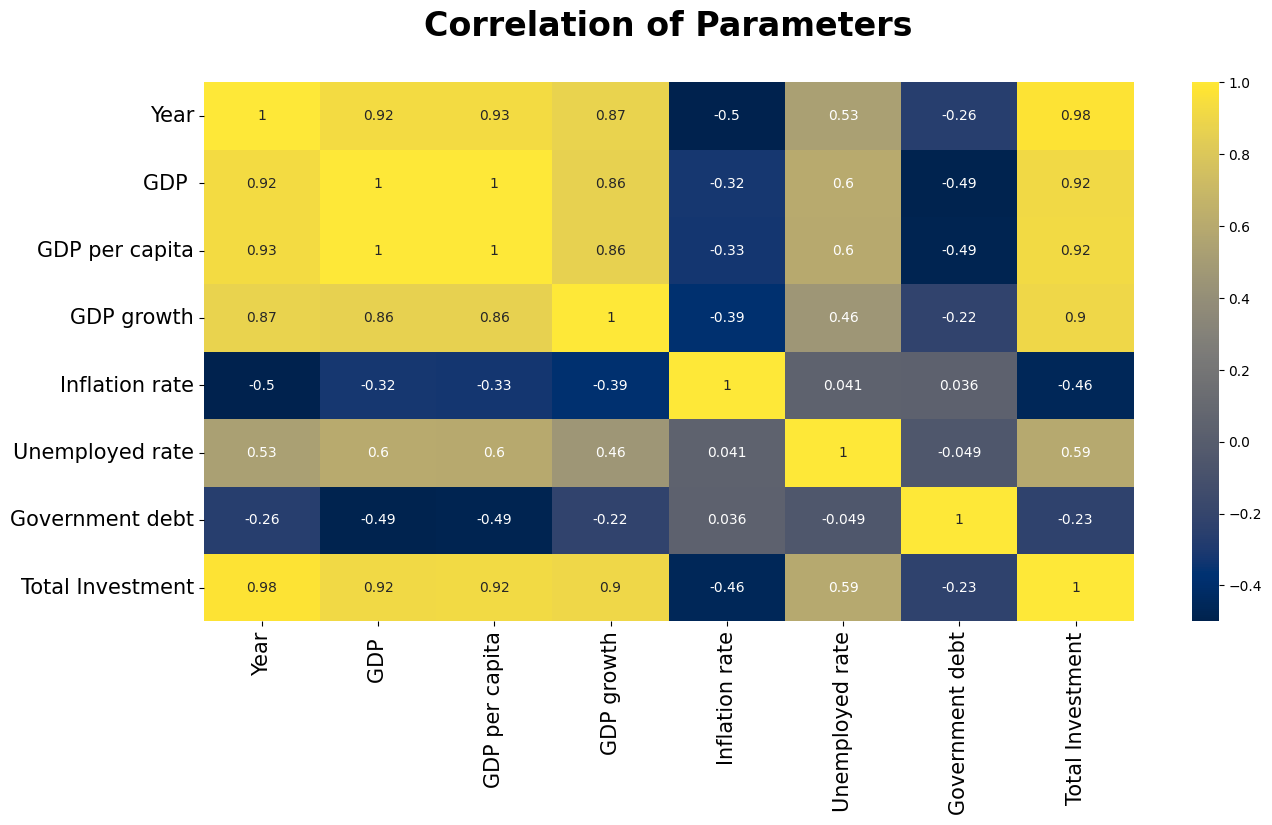

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap='cividis')  # Use 'cividis' color palette
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
plt.title("Correlation of Parameters\n", fontsize=24, fontweight='bold', color='black')
plt.show()



#  Line Plot of GDP per Capita Over the Years
This section visualizes the rise in GDP per capita over the years.

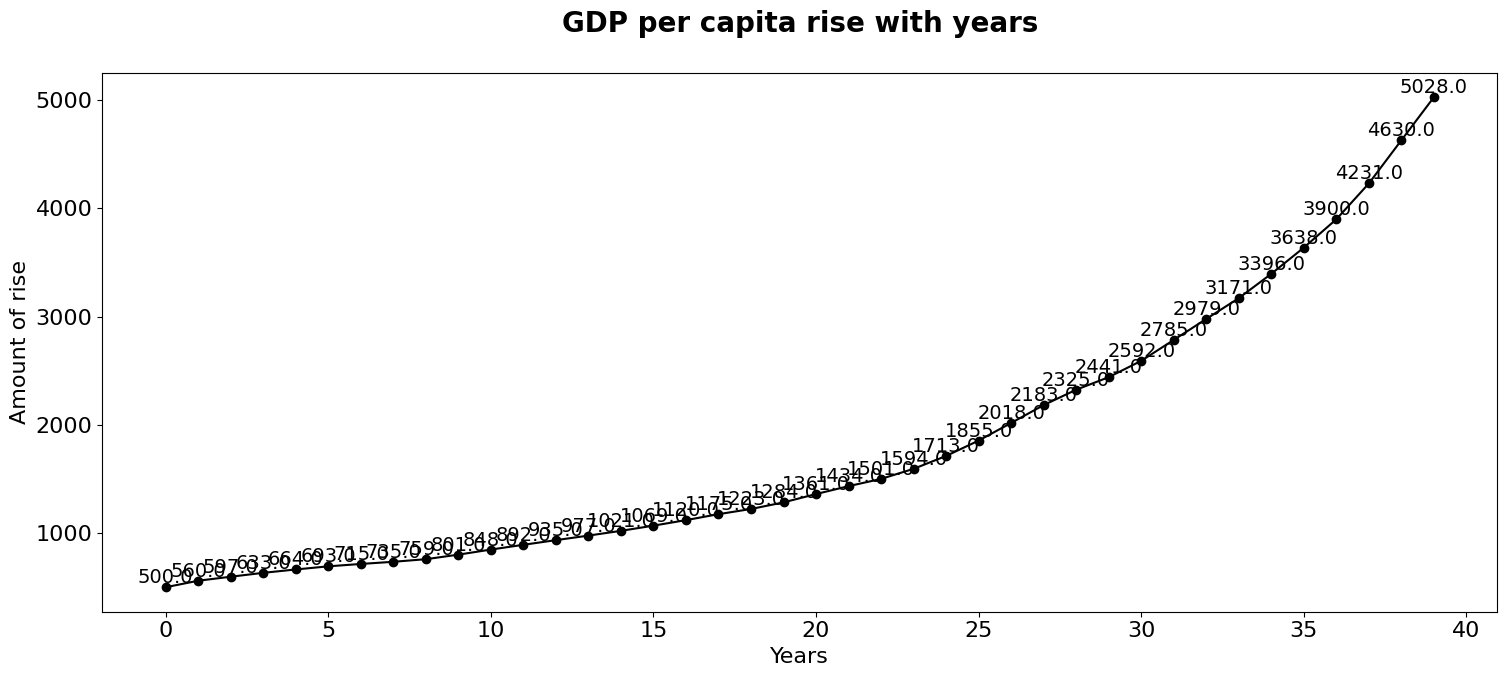

In [67]:
# If you want to create df1 as a copy of df (optional)
df1 = df.copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
sns.set_palette('cividis')

# Create the line plot using df or df1 depending on what you intend
plt.figure(figsize=(18,7))
plt.plot(df.index, df['GDP per capita'], color='black', marker='o', linestyle='-')

# Customize ticks and labels
plt.xticks(fontsize=16, color='black')
plt.xlabel('Years', fontsize=16, color='black')
plt.ylabel('Amount of rise', fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title('GDP per capita rise with years\n', fontsize=20, fontweight='bold', color='black')

# Add data labels on each point
for i, value in enumerate(df['GDP per capita']):
    plt.text(df.index[i], value, round(value, 2), ha='center', va='bottom', fontsize=14, color='black')

# Show the plot
plt.show()


# Line Plot of GDP Over the Years
This section visualizes the rise in GDP over the years.

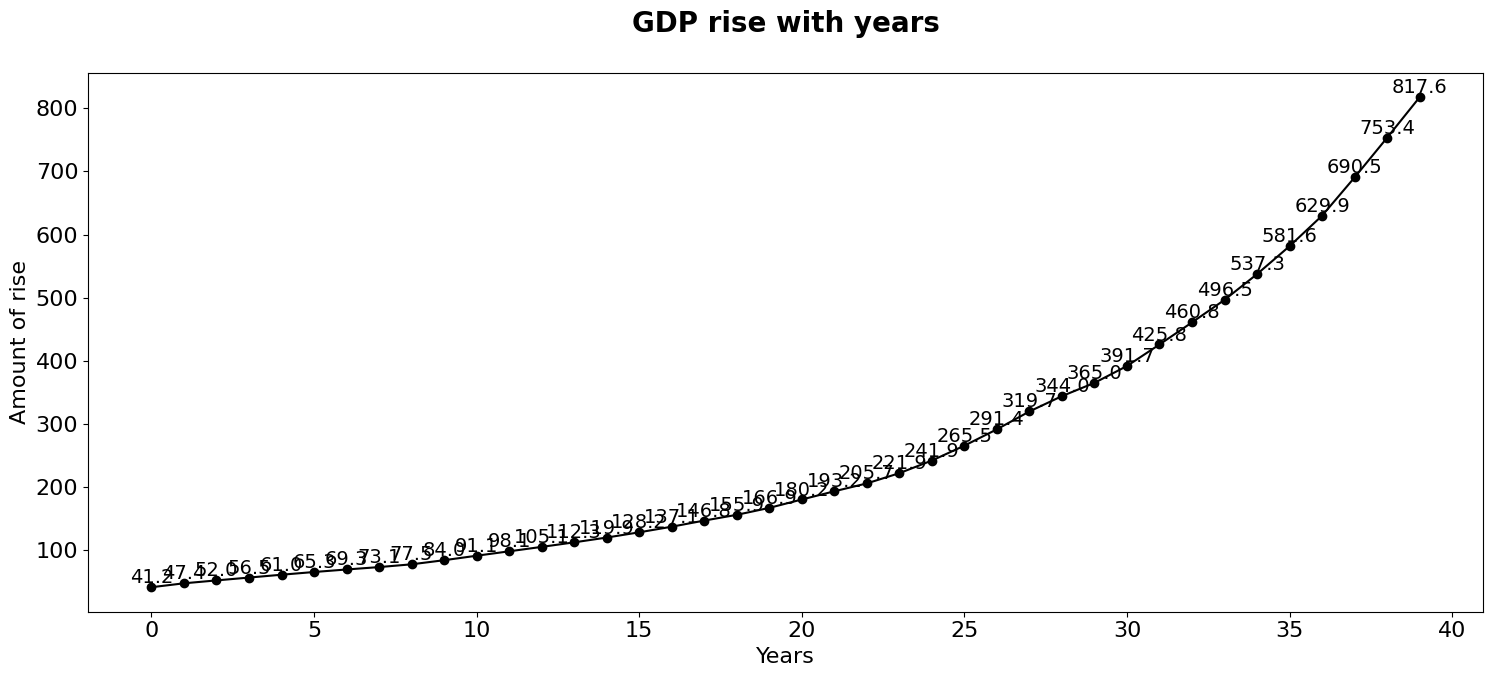

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette to 'Cividis'
sns.set_palette('cividis')

# Create the line plot
plt.figure(figsize=(18,7))
plt.plot(df1.index, df1['GDP '], color='black', marker='o', linestyle='-')

# Customize ticks and labels
plt.xticks(fontsize=16, color='black')
plt.xlabel('Years', fontsize=16, color='black')
plt.ylabel('Amount of rise', fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title('GDP rise with years\n', fontsize=20, fontweight='bold', color='black')

# Add data labels on each point
for i, value in enumerate(df1['GDP ']):
    plt.text(df1.index[i], value, round(value, 2), ha='center', va='bottom', fontsize=14, color='black')

# Show the plot
plt.show()


# Linear Regression Plot: GDP Growth vs. Government Debt
This section creates a scatter plot with a regression line showing the relationship between GDP growth and government debt.

<Figure size 1800x700 with 0 Axes>

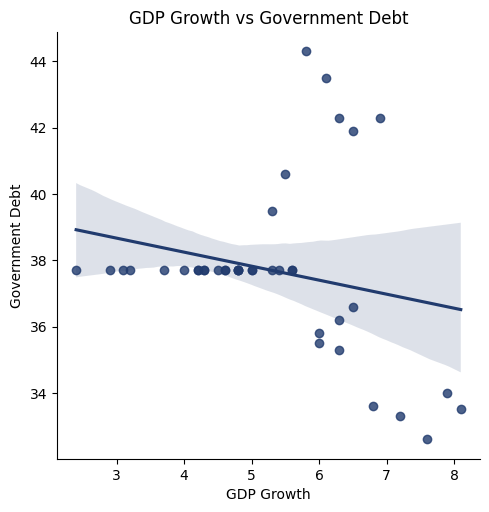

In [69]:
import seaborn as sns

plt.figure(figsize=(18,7))
sns.lmplot(x='GDP growth', y='Government debt', data=df)
plt.title('GDP Growth vs Government Debt')
plt.xlabel('GDP Growth')
plt.ylabel('Government Debt')
plt.show()


# Bar Plot: GDP Growth vs. Total Investment
This section creates a bar plot to visualize the relationship between GDP growth and total investment.

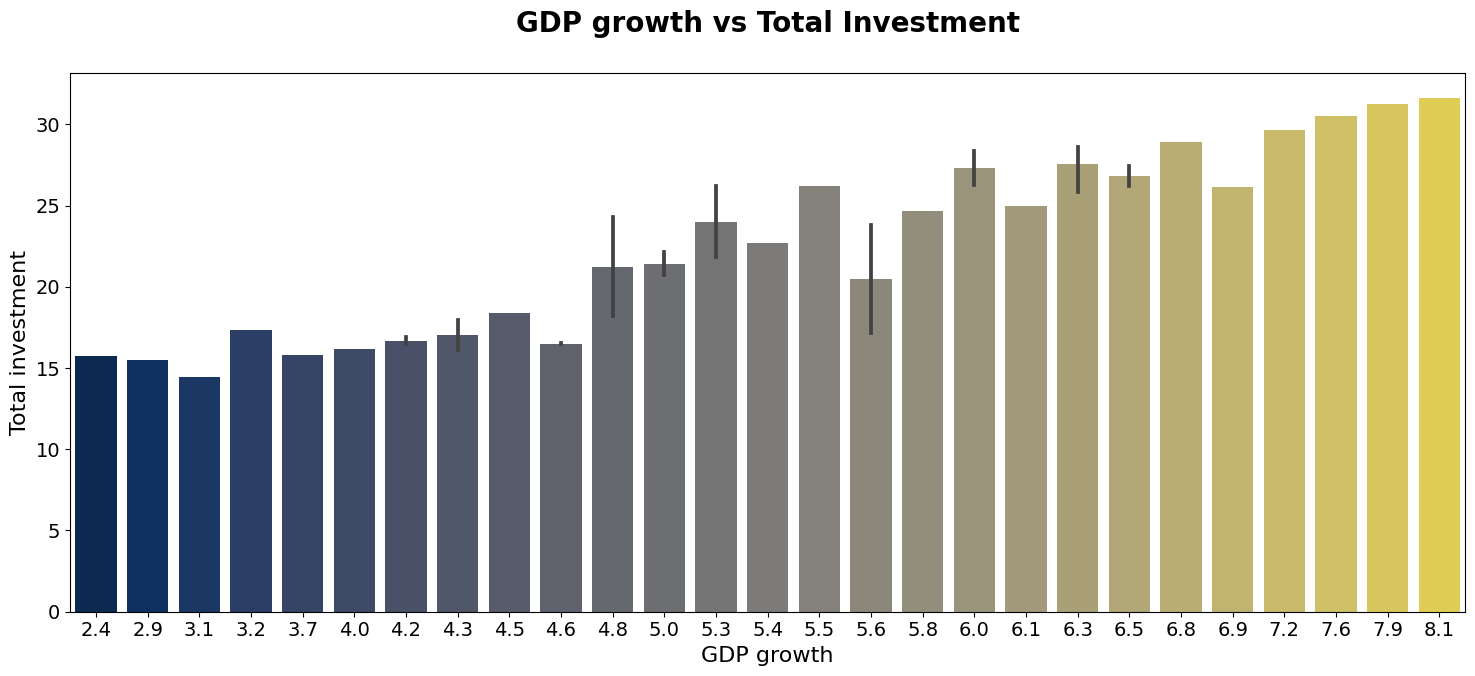

In [70]:
# Create the bar plot using Seaborn with the 'Cividis' color palette
plt.figure(figsize=(18,7))
sns.barplot(x='GDP growth', y='Total Investment', data=df, palette='cividis')

# Customize ticks and labels
plt.xticks(fontsize=14, color='black')
plt.xlabel('GDP growth', fontsize=16, color='black')
plt.ylabel('Total investment', fontsize=16, color='black')
plt.yticks(fontsize=14, color='black')
plt.title('GDP growth vs Total Investment\n', fontsize=20, fontweight='bold', color='black')


# Show the plot
plt.show()



#  Dual Line Plot: GDP Effect on Inflation and Government Debt
This section visualizes the relationship between GDP, inflation rate, and government debt.

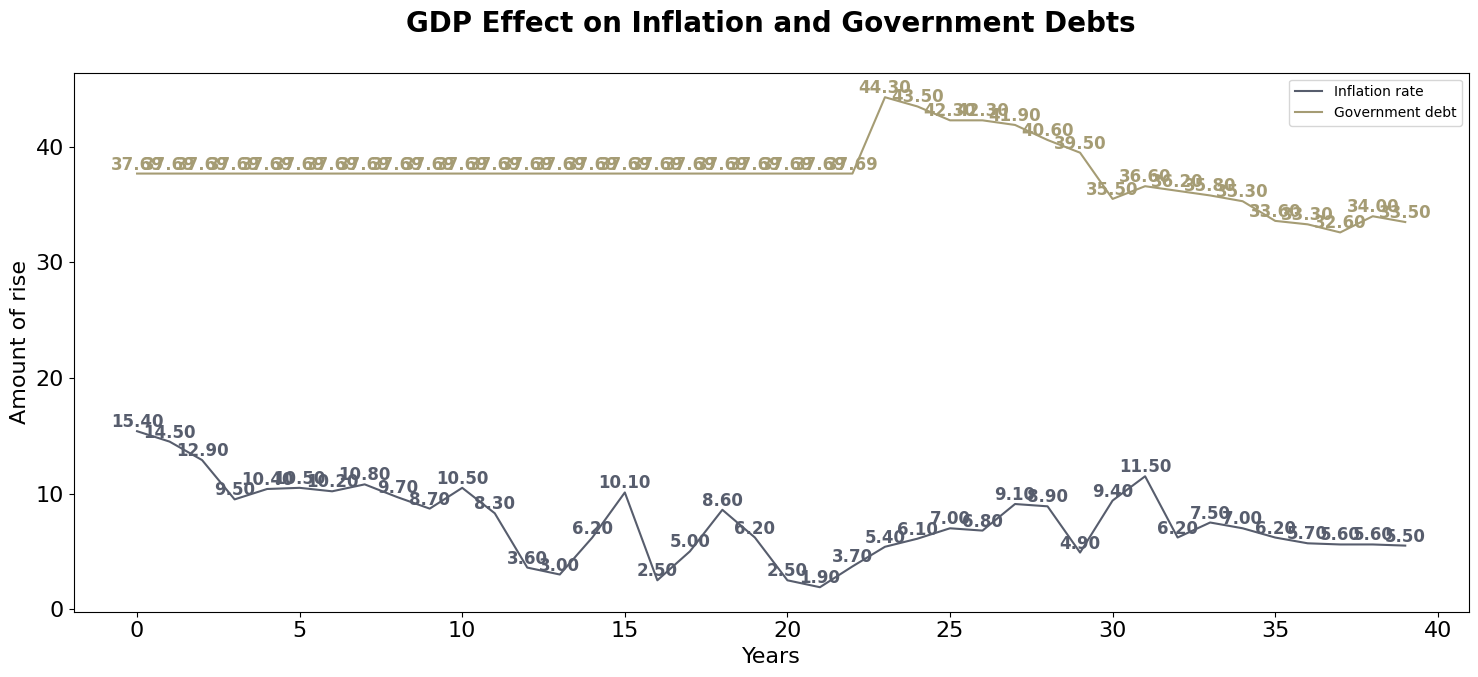

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the 'Cividis' color palette
cividis_colors = sns.color_palette("cividis", n_colors=2)

# Plotting
plt.figure(figsize=(18,7))
df['Inflation rate'].plot(color=cividis_colors[0], label='Inflation rate')
df['Government debt'].plot(color=cividis_colors[1], label='Government debt')

# Customize ticks and labels
plt.xticks(fontsize=16, color='black')
plt.xlabel('Years', fontsize=16, color='black')
plt.ylabel('Amount of rise', fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')

# Add title and legend
plt.title('GDP Effect on Inflation and Government Debts\n', fontsize=20, fontweight='bold', color='black')
plt.legend()

# Add data labels on top of bars
for i in range(len(df)):
    plt.text(df.index[i], df['Inflation rate'].iloc[i], f'{df["Inflation rate"].iloc[i]:.2f}', 
             ha='center', va='bottom', fontsize=12, color=cividis_colors[0], fontweight='bold')
    plt.text(df.index[i], df['Government debt'].iloc[i], f'{df["Government debt"].iloc[i]:.2f}', 
             ha='center', va='bottom', fontsize=12, color=cividis_colors[1], fontweight='bold')

# Show plot
plt.show()


# 3D Scatter Plot: GDP Growth, Unemployment Rate & Inflation Rate
This section creates a 3D scatter plot to visualize the relationship between GDP growth, unemployment rate, and inflation rate.

In [72]:
import plotly.express as px

# Create a 3D scatter plot with 'Cividis' color palette and labels
fig = px.scatter_3d(df.tail(20), 
                    x='GDP growth', 
                    y='Unemployed rate', 
                    z='Inflation rate', 
                    color='Year',
                    color_continuous_scale='Cividis',  # Apply Cividis color palette
                    labels={
                        'GDP growth': 'GDP Growth (%)',  # Label for x-axis
                        'Unemployed rate': 'Unemployment Rate (%)',  # Label for y-axis
                        'Inflation rate': 'Inflation Rate (%)',  # Label for z-axis
                        'Year': 'Year'  # Label for color legend
                    })

# Update layout with a title
fig.update_layout(title='3D Scatter Plot of GDP Growth, Unemployment Rate & Inflation Rate')

# Show the plot
fig.show()



# Conclusion
The data analysis provided valuable insights into the economic conditions of Bangladesh over the years. The trends in GDP growth, inflation, government debt, and other key indicators reveal the challenges and opportunities the country has faced. These insights can be crucial for policymakers, economists, and analysts in understanding the factors driving economic growth and in making informed decisions for future economic planning.The analysis and visualizations provide a clear picture of how various economic factors like GDP growth, inflation rate, total investment, unemployment rate, and government debt have evolved over time.